In [12]:
#libraries used
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

loading the data and listing all the column names 

In [13]:
df=pd.read_csv(r"PPR-ALL.csv",encoding='unicode_escape')
print(df.columns.tolist())

['Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Eircode', 'Price (\x80)', 'Not Full Market Price', 'VAT Exclusive', 'Description of Property', 'Property Size Description']


C:\Users\chivu\AppData\Local\Temp\ipykernel_34236\2648627520.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"PPR-ALL.csv",encoding='unicode_escape')


In [14]:
#viewing the dataset
df

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
771763,13/02/2026,"CLOGHEEN, BLARNEY RD, CORK",Cork,T23Y017,"128,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
771764,13/02/2026,"DERRADA, KILLIMOR, GALWAY",Galway,H53P6D0,"130,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
771765,13/02/2026,"GARDENSTOWN, ROSCOMMON",Roscommon,N39RP40,"317,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
771766,13/02/2026,"PATRICK ST, BOYLE, CO ROSCOMMON",Roscommon,F52NP70,"65,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


Data preperation
change the data type of Date of Sale from string to date in the format of dd//mm/yy
changing the data type of Price from string to numeric and also removing the euro sign and comma and converting to float

In [15]:
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'],format="%d/%m/%Y")
df['Price (\x80)']=df['Price (\x80)'].str.replace('\x80','').str.replace(',','').astype(float)


we use resample("M").mean() to group by all the prices by month and apply mean on that this is done as the data was tooo noisy to plot line chart 

C:\Users\chivu\AppData\Local\Temp\ipykernel_34236\2250929051.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  filtered_monthly_price=filtered_df["Price (\x80)"].resample("M").mean()


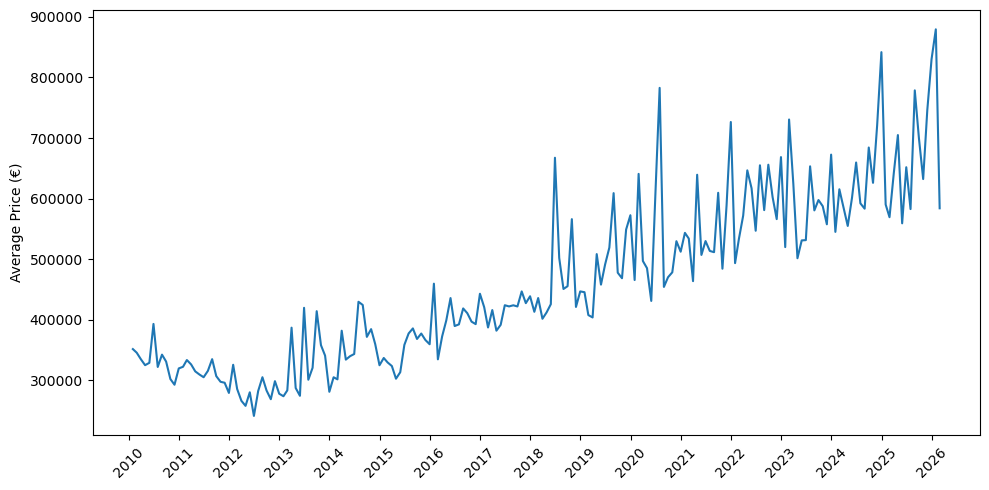

In [18]:
filtered_df=df[df['County']=="Dublin"]
filtered_df = filtered_df.sort_values("Date of Sale (dd/mm/yyyy)")
filtered_df = filtered_df.set_index("Date of Sale (dd/mm/yyyy)")
filtered_monthly_price=filtered_df["Price (\x80)"].resample("M").mean()

plt.figure(figsize=(10,5))
plt.plot(filtered_monthly_price)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


most of the counties follow a similar trend as Dublin where they showed an intial dowards trend in the beginging 2010 to 2012 and for some til 2014 but 2014 onwards most of counties showard a general upward trend. 

The initial decline in irish property market price was caused by "over-correction" or freefall following the bursting of a massive property bubble also knows as the irish property bubble.In 2007 the prices stabilised and then started to fall until 2010  and subsequent years following the shock effect of the Great Recession.

From 2013 onwards economic recovery period started Prices rose by an average of 4.3% in the first three months of the 2017 representing the largest three-month increase in two years. 

C:\Users\chivu\AppData\Local\Temp\ipykernel_34236\675024433.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  filtered_monthly_price=filtered_df["Price (\x80)"].resample("M").mean()


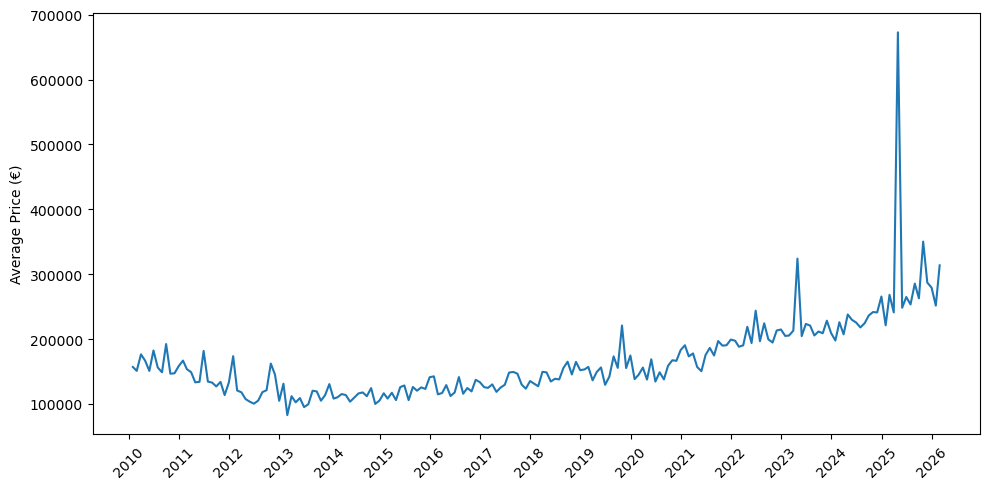

In [20]:
filtered_df=df[df['County']=="Tipperary"]
filtered_df = filtered_df.sort_values("Date of Sale (dd/mm/yyyy)")
filtered_df = filtered_df.set_index("Date of Sale (dd/mm/yyyy)")
filtered_monthly_price=filtered_df["Price (\x80)"].resample("M").mean()

plt.figure(figsize=(10,5))
plt.plot(filtered_monthly_price)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\chivu\AppData\Local\Temp\ipykernel_34236\817857712.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  filtered_monthly_price=filtered_df["Price (\x80)"].resample("M").mean()


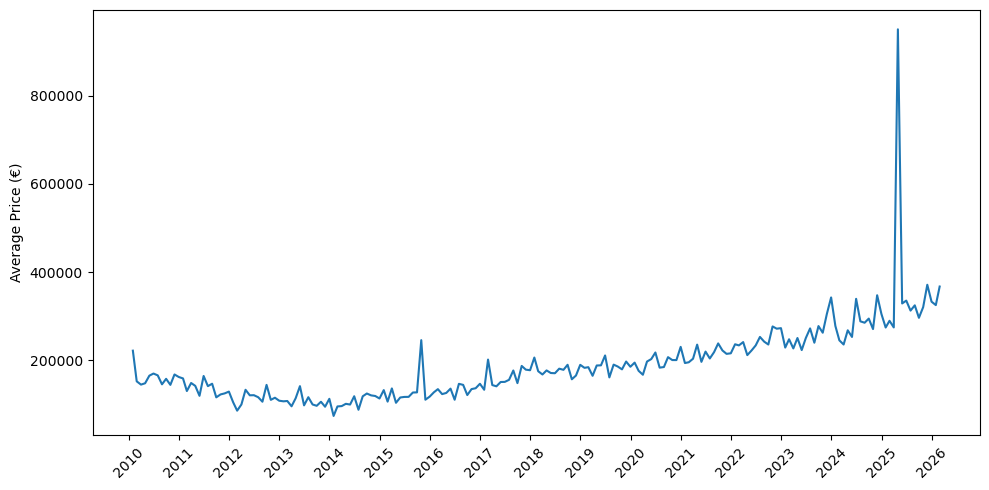

In [ ]:
filtered_df=df[df['County']=="Westmeath"]
filtered_df = filtered_df.sort_values("Date of Sale (dd/mm/yyyy)")
filtered_df = filtered_df.set_index("Date of Sale (dd/mm/yyyy)")
filtered_monthly_price=filtered_df["Price (\x80)"].resample("M").mean()

plt.figure(figsize=(10,5))
plt.plot(filtered_monthly_price)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

a few counties anomalies are Westmeath and Tipperary 
so why was there a huge increase of land prices  in these two regions 
Westmeath and Tipperary are known for their agriculture and farming lands these are majour reason why there was huge increase 
1.Extremely Low Supply: Only a very small percentage of agricultural land is brought to the market annually, creating a scarcity that drives up prices.
2.High Demand from Dairy Sector: Despite some volatility, dairy farmers remain the primary buyers, accounting for over three-quarters of farmland purchases.

westmeath had much more stepper increase in land prices than tipperary this is because of  Proximity to Dublin and Connectivity: As part of the Midlands and commuter belt, Westmeath experienced strong demand for all property types in 2025, driven by buyers seeking value, space, and connectivity to Dublin.